In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
cov=pd.read_csv("covid_19.csv")

In [3]:
cov.head()

,ProvinceState,CountryRegion,LastUpdate,Lat,Long,Confirmed,Deaths,Recovered,Active,FIPS,IncidentRate,PeopleTested,PeopleHospitalized,MortalityRate,UID,ISO3,TestingRate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [4]:
cov.tail()

,ProvinceState,CountryRegion,LastUpdate,Lat,Long,Confirmed,Deaths,Recovered,Active,FIPS,IncidentRate,PeopleTested,PeopleHospitalized,MortalityRate,UID,ISO3,TestingRate,Hospitalization_Rate
53,Virginia,US,2020-05-21 02:32:54,37.7693,-78.1700,32908,1075,4523.0,27310.0,51,385.541875,212626.0,6059.0,3.266683,84000051,USA,2491.072892,18.411936
54,Washington,US,2020-05-21 02:32:54,47.4009,-121.4905,18971,1037,NaN,17934.0,53,249.130224,293120.0,NaN,5.466238,84000053,USA,3849.298999,NaN
55,West Virginia,US,2020-05-21 02:32:54,38.4912,-80.9545,1567,69,950.0,548.0,54,87.437024,80641.0,NaN,4.403318,84000054,USA,4499.686689,NaN
56,Wisconsin,US,2020-05-21 02:32:54,44.2685,-89.6165,13413,481,7728.0,5204.0,55,230.367575,167713.0,2161.0,3.586073,84000055,USA,2880.462020,16.111235
57,Wyoming,US,2020-05-21 02:32:54,42.7560,-107.3025,787,11,528.0,248.0,56,135.980607,18840.0,74.0,1.397713,84000056,USA,3255.240955,9.402795


In [5]:
cov.shape

(58, 18)

In [6]:
cov.isnull().sum()

ProvinceState            0
CountryRegion            0
LastUpdate               0
Lat                      2
Long                     2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
IncidentRate             2
PeopleTested             2
PeopleHospitalized      25
MortalityRate            1
UID                      0
ISO3                     0
TestingRate              2
Hospitalization_Rate    25
dtype: int64

In [7]:
cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
ProvinceState           58 non-null object
CountryRegion           58 non-null object
LastUpdate              58 non-null object
Lat                     56 non-null float64
Long                    56 non-null float64
Confirmed               58 non-null int64
Deaths                  58 non-null int64
Recovered               42 non-null float64
Active                  58 non-null float64
FIPS                    58 non-null int64
IncidentRate            56 non-null float64
PeopleTested            56 non-null float64
PeopleHospitalized      33 non-null float64
MortalityRate           57 non-null float64
UID                     58 non-null int64
ISO3                    58 non-null object
TestingRate             56 non-null float64
Hospitalization_Rate    33 non-null float64
dtypes: float64(10), int64(4), object(4)
memory usage: 8.3+ KB


In [8]:
cov.isna().sum()

ProvinceState            0
CountryRegion            0
LastUpdate               0
Lat                      2
Long                     2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
IncidentRate             2
PeopleTested             2
PeopleHospitalized      25
MortalityRate            1
UID                      0
ISO3                     0
TestingRate              2
Hospitalization_Rate    25
dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

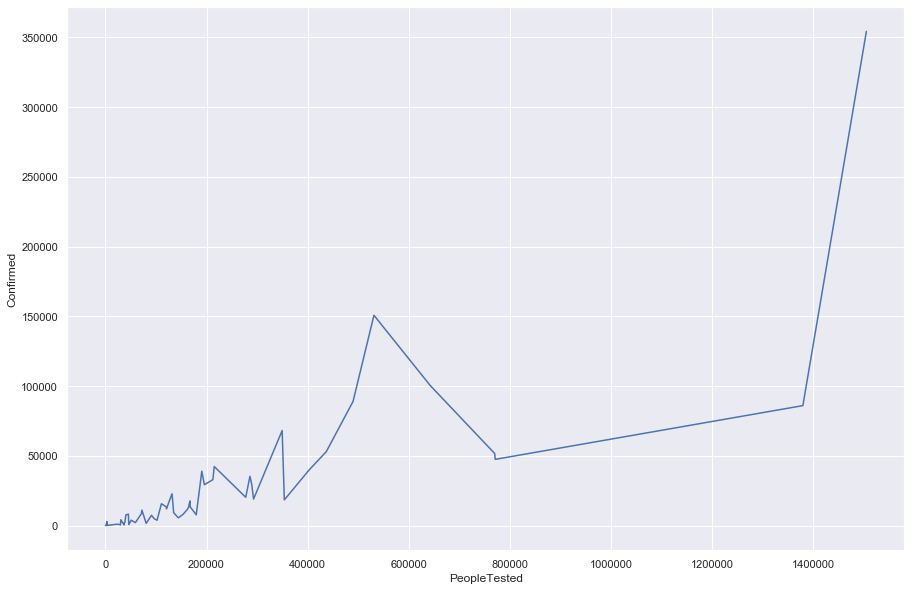

In [9]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="PeopleTested",y="Confirmed",data=cov)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

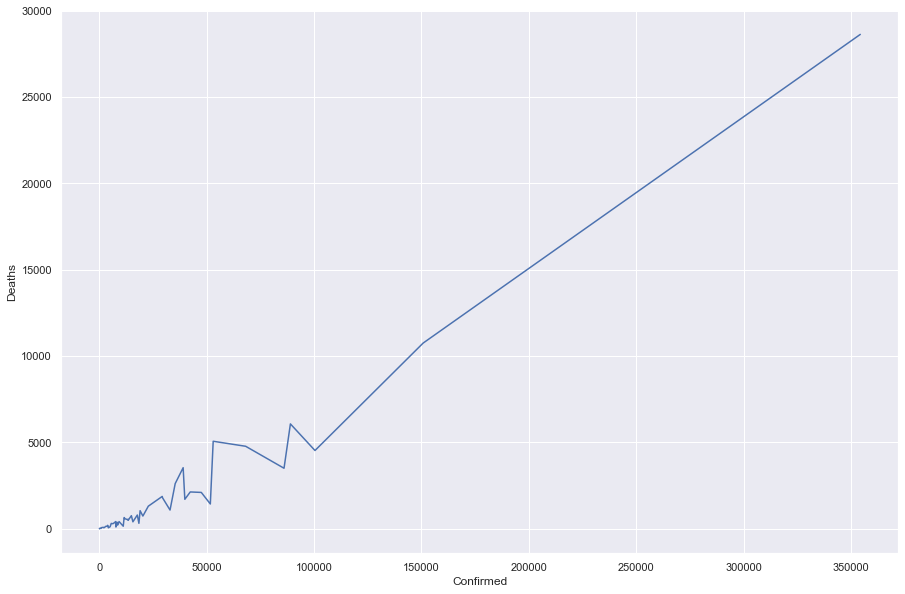

In [10]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="Confirmed",y="Deaths",data=cov)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

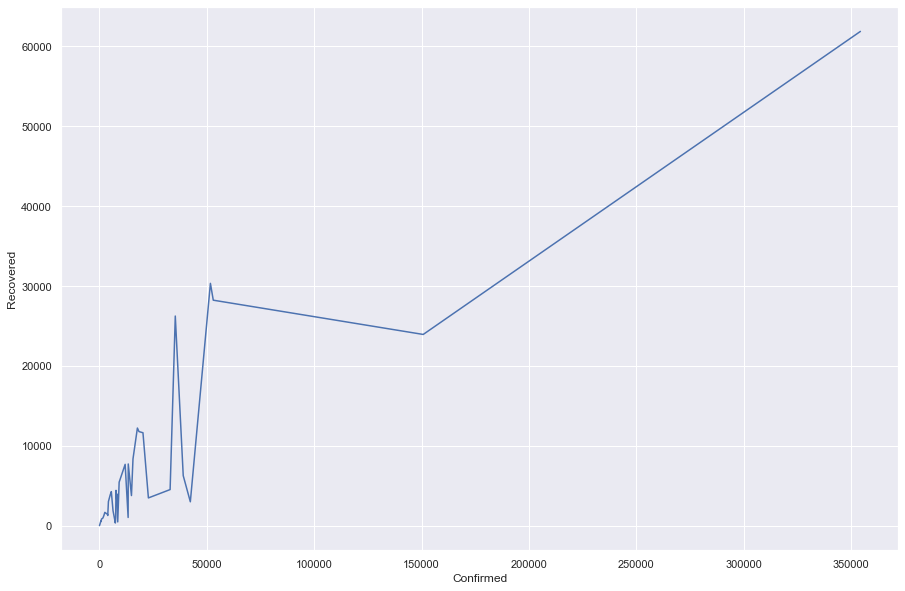

In [11]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="Confirmed",y="Recovered",data=cov)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

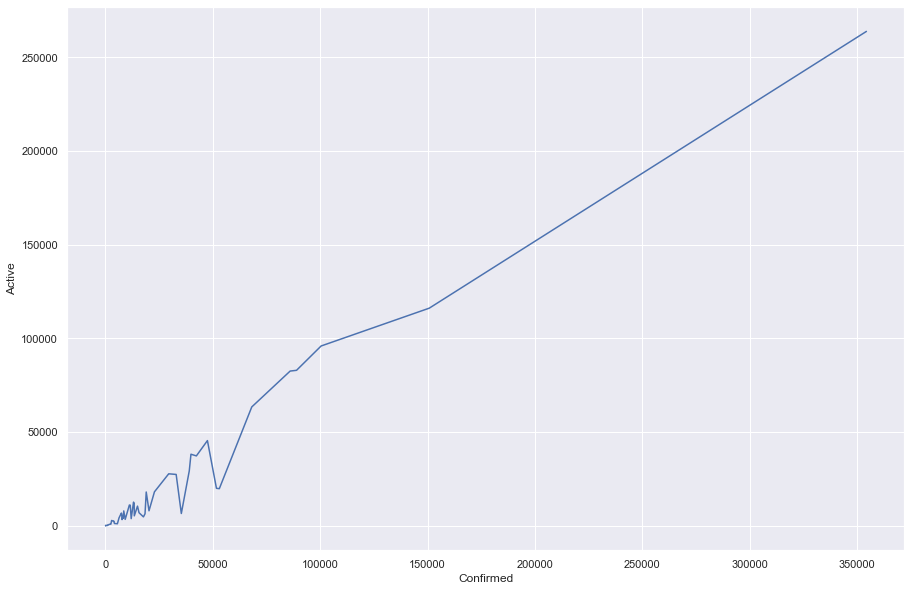

In [12]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="Confirmed",y="Active",data=cov)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

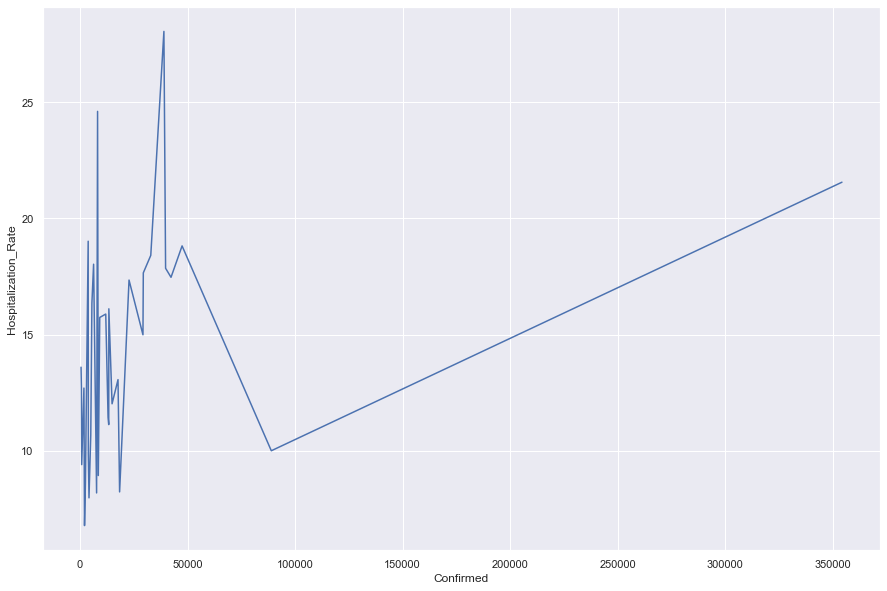

In [13]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="Confirmed",y="Hospitalization_Rate",data=cov)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

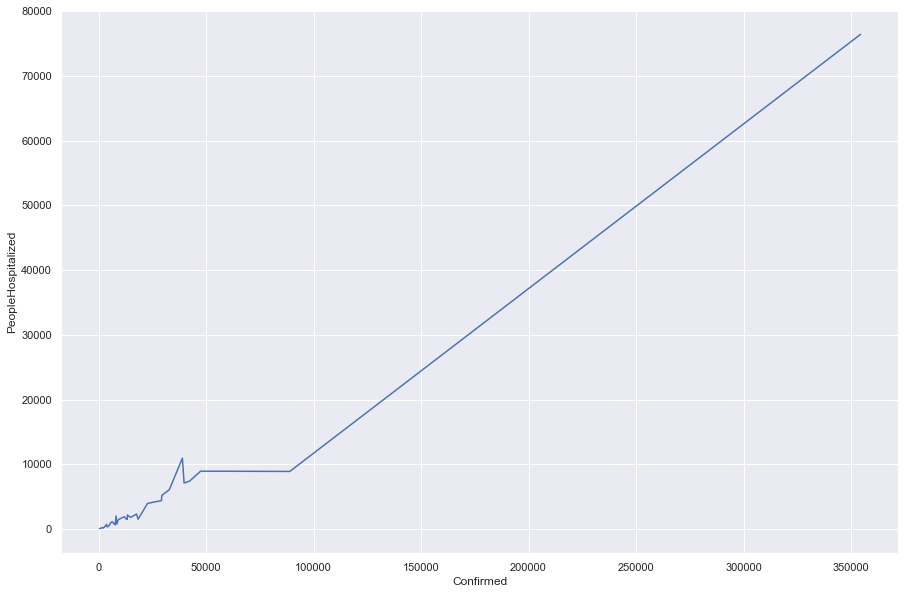

In [14]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="Confirmed",y="PeopleHospitalized",data=cov)
plt.show 

<function matplotlib.pyplot.show(*args, **kw)>

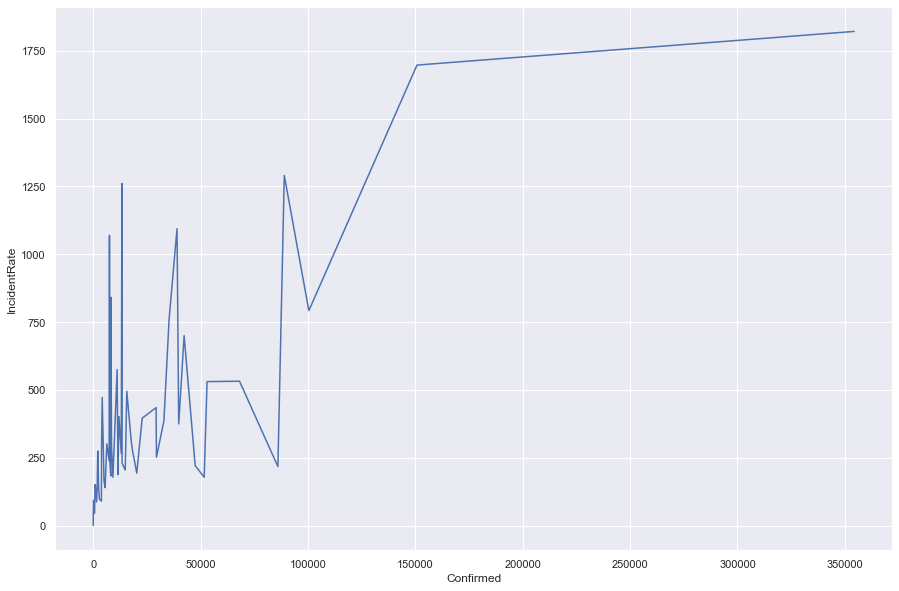

In [15]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="Confirmed",y="IncidentRate",data=cov)
plt.show

In [16]:
cov.corr()

,Lat,Long,Confirmed,Deaths,Recovered,Active,FIPS,IncidentRate,PeopleTested,PeopleHospitalized,MortalityRate,UID,TestingRate,Hospitalization_Rate
Lat,1.000000,-0.278274,0.120959,0.120024,0.043318,0.120148,-0.374943,0.245693,0.084769,0.065030,-0.189675,0.774106,0.309579,-0.162856
Long,-0.278274,1.000000,0.009998,0.028772,-0.043379,0.011654,0.367911,0.041318,-0.077781,0.280909,0.318569,-0.526908,0.190191,0.251661
Confirmed,0.120959,0.009998,1.000000,0.982191,0.876856,0.985218,-0.096696,0.711776,0.828022,0.989936,0.383425,0.153972,0.334032,0.327376
Deaths,0.120024,0.028772,0.982191,1.000000,0.856295,0.954378,-0.075053,0.712117,0.741730,0.992313,0.427721,0.120043,0.345441,0.325817
Recovered,0.043318,-0.043379,0.876856,0.856295,1.000000,0.809437,-0.013571,0.592014,0.950785,0.962082,0.362330,0.166898,0.252155,0.302197
Active,0.120148,0.011654,0.985218,0.954378,0.809437,1.000000,-0.092276,0.703931,0.829687,0.976456,0.368403,0.146354,0.322773,0.332398
FIPS,-0.374943,0.367911,-0.096696,-0.075053,-0.013571,-0.092276,1.000000,-0.220264,-0.194011,0.013433,-0.262258,0.058022,-0.092705,-0.172665
IncidentRate,0.245693,0.041318,0.711776,0.712117,0.592014,0.703931,-0.220264,1.000000,0.441669,0.725370,0.373338,0.264768,0.620621,0.258029
PeopleTested,0.084769,-0.077781,0.828022,0.741730,0.950785,0.829687,-0.194011,0.441669,1.000000,0.906210,0.231301,0.236043,0.230753,0.356618
PeopleHospitalized,0.065030,0.280909,0.989936,0.992313,0.962082,0.976456,0.013433,0.725370,0.906210,1.000000,0.509658,0.013433,0.331753,0.377586


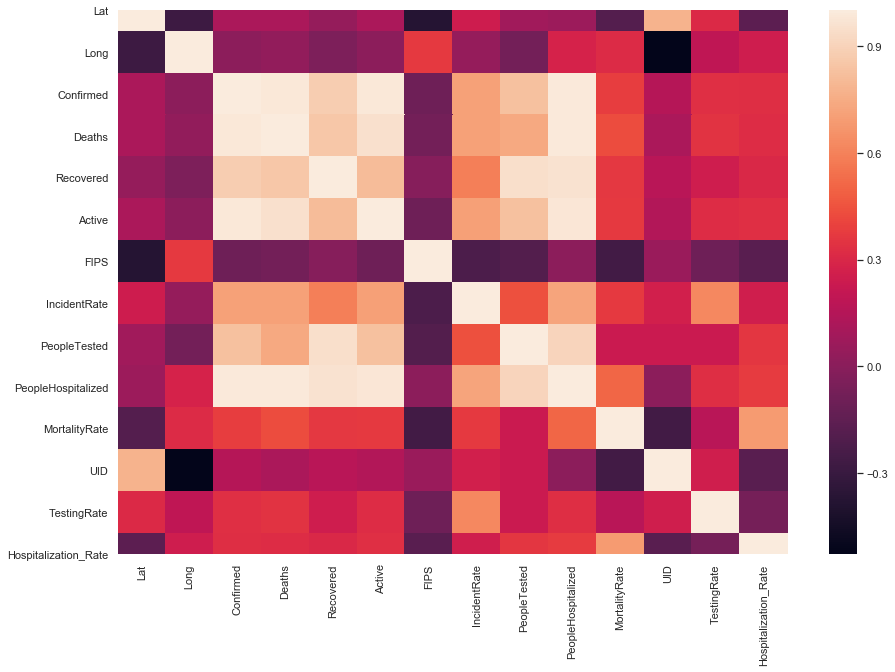

In [17]:
sns.heatmap(cov.corr())

In [18]:
cov.drop(['ProvinceState','CountryRegion','LastUpdate','ISO3'],axis=1 , inplace=True)

In [19]:
cov.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active,FIPS,IncidentRate,PeopleTested,PeopleHospitalized,MortalityRate,UID,TestingRate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,5.800000e+01,56.000000,33.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541
std,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,2.378302e+07,1933.169297,5.047403
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,8.400001e+07,2712.800274,10.000000
50%,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,3469.782532,13.598326
75%,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,8.400004e+07,4763.649736,17.658649
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


In [20]:
df=cov.fillna(cov.mean())
df.head(10)

,Lat,Long,Confirmed,Deaths,Recovered,Active,FIPS,IncidentRate,PeopleTested,PeopleHospitalized,MortalityRate,UID,TestingRate,Hospitalization_Rate
0,32.318200,-86.902300,13052,522,7007.428571,12530.0,1,266.194321,1.644500e+05,1493.000000,3.999387,84000001,3353.942386,11.438860
1,61.370700,-152.404400,401,10,352.000000,39.0,2,54.815493,3.704500e+04,4897.454545,2.493766,84000002,5063.940017,14.342541
2,-14.271000,-170.132000,0,0,7007.428571,0.0,60,0.000000,1.240000e+02,4897.454545,4.458248,16,222.857246,14.342541
3,33.729800,-111.431200,14906,747,3773.000000,10386.0,4,204.788838,1.654350e+05,1792.000000,5.011405,84000004,2272.859351,12.022005
4,34.969700,-92.373100,5003,107,3852.000000,1044.0,5,165.782801,9.625800e+04,535.000000,2.138717,84000005,3189.670370,10.693584
5,36.116200,-119.681600,85997,3497,7007.428571,82500.0,6,217.646575,1.380120e+06,4897.454545,4.066421,84000006,3492.893832,14.342541
6,39.059800,-105.311100,22797,1299,3478.000000,18020.0,8,395.868121,1.318370e+05,3955.000000,5.698118,84000008,2289.339188,17.348774
7,41.597800,-72.755400,39017,3529,6264.000000,29224.0,9,1094.357902,1.907180e+05,10946.000000,9.044775,84000009,5349.302875,28.054438
8,39.318500,-75.507100,8194,310,3965.000000,3919.0,10,841.476990,4.541200e+04,4897.454545,3.783256,84000010,4663.552976,14.342541
9,36.840089,-85.206614,49,0,7007.428571,49.0,88888,396.230806,2.258534e+05,4897.454545,0.000000,84088888,3894.186870,14.342541


In [21]:
col=df.columns
col

Index(['Lat', 'Long', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS',
       'IncidentRate', 'PeopleTested', 'PeopleHospitalized', 'MortalityRate',
       'UID', 'TestingRate', 'Hospitalization_Rate'],
      dtype='object')

In [22]:
df['Confirmed']=(df['Confirmed']-df['Confirmed'].min())/(df['Confirmed'].max()-df['Confirmed'].min())
df['Recovered']=(df['Recovered']-df['Recovered'].min())/(df['Recovered'].max()-df['Recovered'].min())
df['Deaths']=(df['Deaths']-df['Deaths'].min())/(df['Deaths'].max()-df['Deaths'].min())
df['Active']=(df['Active']-df['Active'].min())/(df['Active'].max()-df['Active'].min())
df['IncidentRate']=(df['IncidentRate']-df['IncidentRate'].min())/(df['IncidentRate'].max()-df['IncidentRate'].min())
df['PeopleHospitalized']=(df['PeopleHospitalized']-df['PeopleHospitalized'].min())/(df['PeopleHospitalized'].max()-df['PeopleHospitalized'].min())
df['UID']=(df['UID']-df['UID'].min())/(df['UID'].max()-df['UID'].min())
df['TestingRate']=(df['TestingRate']-df['TestingRate'].min())/(df['TestingRate'].max()-df['TestingRate'].min())
df['FIPS']=(df['FIPS']-df['FIPS'].min())/(df['FIPS'].max()-df['FIPS'].min())
df['PeopleTested']=(df['PeopleTested']-df['PeopleTested'].min())/(df['PeopleTested'].max()-df['PeopleTested'].min())

In [23]:
df.head()

,Lat,Long,Confirmed,Deaths,Recovered,Active,FIPS,IncidentRate,PeopleTested,PeopleHospitalized,MortalityRate,UID,TestingRate,Hospitalization_Rate
0,32.3182,-86.9023,0.036832,0.018229,0.113045,0.047489,0.00000,0.146131,0.109135,0.018705,3.999387,0.998811,0.288681,11.438860
1,61.3707,-152.4044,0.001132,0.000349,0.005479,0.000148,0.00001,0.030092,0.024521,0.063298,2.493766,0.998811,0.440280,14.342541
2,-14.2710,-170.1320,0.000000,0.000000,0.113045,0.000000,0.00059,0.000000,0.000000,0.063298,4.458248,0.000000,0.011096,14.342541
3,33.7298,-111.4312,0.042063,0.026086,0.060770,0.039364,0.00003,0.112421,0.109789,0.022621,5.011405,0.998811,0.192838,12.022005
4,34.9697,-92.3731,0.014118,0.003737,0.062046,0.003957,0.00004,0.091008,0.063846,0.006156,2.138717,0.998811,0.274117,10.693584


In [24]:
X=df[['Lat', 'Long', 'Confirmed', 'Active', 'FIPS',
       'IncidentRate', 'PeopleTested', 'PeopleHospitalized', 'MortalityRate',
       'UID', 'TestingRate', 'Hospitalization_Rate',"Recovered"]]
print(X.shape)

y=df[["Deaths"]]
print(y.shape)

(58, 13)
(58, 1)


In [25]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X= sc.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=52)

In [27]:
lr=LinearRegression()
la=Lasso()
en=ElasticNet()
ri=Ridge()
kn=KNeighborsRegressor()
dt=DecisionTreeRegressor(random_state=97)
ab=AdaBoostRegressor(random_state=97)
rf=RandomForestRegressor(random_state=97)
gb=GradientBoostingRegressor(random_state=97)

In [28]:
models=[]
models.append(("LinearRegression",lr))
models.append(("Lasso",la))
models.append(("ElasticNet",en))
models.append(("Ridge",ri))
models.append(("KNeighborsRegressor",kn))
models.append(("DecisionTreeRegressor",dt))
models.append(("AdaBoostRegressor",ab))
models.append(("RandomForestRegressor",rf))
models.append(("GradientBoostingRegressor",gb))

In [29]:
model=[]
R2_score=[]
cvs=[]
MSE=[]
for i,model in models:
    print("-------------------",model,"----------------------")
    print("\n")
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    r2=r2_score(y_test,pred)
    print("R2_score: ",r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pred)
    print("MSE: ",mse)
    MSE.append(mse)
    score=cross_val_score(model,X,y,cv=10,scoring='r2').mean()
    print("Cross Validation: ",score)
    cvs.append(score)
    print("\n")

------------------- LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) ----------------------


R2_score:  0.9650551436494071
MSE:  0.001656694206762713
Cross Validation:  0.6246982231385332


------------------- Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) ----------------------


R2_score:  -0.05621259327297934
MSE:  0.05007378673501052
Cross Validation:  -1.5003109681021212


------------------- ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False) ----------------------


R2_score:  -0.05621259327297934
MSE:  0.05007378673501052
Cross Validation:  -1.5003109681021212


------------------- Ridge(alpha=1.0, copy_X=True, fit_intercept=Tru

I Choose Linear regression as my final model because it perform very well on our dataset.

R2_score:  0.9650551436494071
    
MSE:  0.001656694206762713
    
Cross Validation:  0.6246982231385332


In [30]:
from sklearn.externals import joblib

joblib.dump(lr,'df_joblib')

['df_joblib']